## Section 7_Optimizer (1) Momentum


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

## 문제 1. Rosenbrock 학습시키기

Gradient Descent, Momentum, Momentum Nesterov 을 이용해 rosenbrock 함수의 최소점을 찾아봅니다.

fix me 주석을 지우고 알맞은 코드를 넣어주세요

**Rosenbrock Function**
${\displaystyle f(x,y)=(1-x)^{2}+100(y-x^{2})^{2}},$

![Imgur](https://i.imgur.com/lAuApse.png)

In [0]:
# 우선 실행해 주세요
np.random.seed(30)
tf.random.set_random_seed(30)

def rosenbrock (x, y):    
    return (1-x) ** 2 + 100*(y - x**2) ** 2

def generate_rosenbrock_plot():
    # rosenbroc function을 plotting 합니다.
    xmin, xmax, xstep = -4.5, 4.5, .2
    ymin, ymax, ystep = -4.5, 4.5, .2

    xs_ = np.arange(xmin, xmax, xstep)
    ys_ = np.arange(ymin, ymax, ystep)

    x, y = np.meshgrid(xs_, ys_)
    z = rosenbrock(x,y)
    
    plt.figure(figsize=(8, 5))
    ax = plt.axes(projection='3d', elev=50, azim=-50)
    
    # minimum point 
    min_x, min_y = (1.0, 1.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'r*', markersize=10)

    # init point 
    min_x, min_y = (-4.0, -4.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'b*', markersize=10)
    
    ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                    edgecolor='None', alpha=0.3, cmap=plt.cm.jet)

    ax.view_init(60, 50)
    ax.set_title("rosenbrock Function Visualization")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    return ax

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* `#FixMe` 부분을 고쳐주세요

In [0]:
def gradient_descent_graph(start_x, start_y, func, lr):
    graph = tf.Graph()
    with graph.as_default():
        x = tf.Variable(initial_value=tf.constant(start_x), name='x')
        y = tf.Variable(initial_value=tf.constant(start_y), name='y')

        # Get Gradient x,y with tf_f
        z = func(x, y)
        z = tf.identity(z, name='z')
        train_op = tf.train.GradientDescentOptimizer(lr).minimize(z)
    return graph

In [0]:
def momentum_graph(start_x, start_y, func, lr, momentum=0.9):
    graph = tf.Graph()
    with graph.as_default():
        x = tf.Variable(initial_value=tf.constant(start_x), name='x')
        y = tf.Variable(initial_value=tf.constant(start_y), name='y')

        z = func(x, y)
        z = tf.identity(z, name='z')
        train_op = tf.train.MomentumOptimizer(lr, momentum).minimize(z)
    return graph

In [0]:
def nag_momentum_graph(start_x, start_y, func, lr, momentum=0.9):
    graph = tf.Graph()
    with graph.as_default():
        x = tf.Variable(initial_value=tf.constant(start_x), name='x')
        y = tf.Variable(initial_value=tf.constant(start_y), name='y')
        
        z = func(x, y)
        z = tf.identity(z, name='z')
        train_op = tf.train.MomentumOptimizer(lr, momentum, use_nesterov=True).minimize(z)
    return graph

In [0]:
def trace(graph, max_iter):
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())

        x = graph.get_tensor_by_name('x:0')
        y = graph.get_tensor_by_name('y:0')
        z = graph.get_tensor_by_name('z:0')
        train_op = tf.get_collection(tf.GraphKeys.TRAIN_OP)[0]

        xs, ys, zs = [], [], []
        for i in range(max_iter):
            x_, y_, z_ = sess.run([x, y, z])

            xs.append(x_)
            ys.append(y_)
            zs.append(z_)

            sess.run(train_op)
    return xs, ys, zs

W0905 02:17:35.959443 139770110392192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


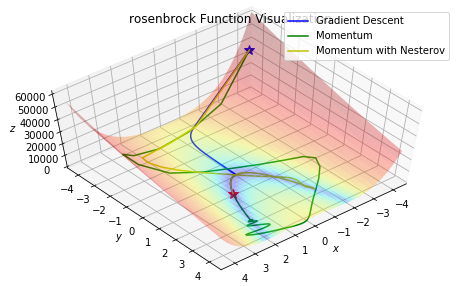

In [7]:
start_x, start_y = -4., -4.

# Gradient Descent 
learning_rate = 1e-4
max_iter = 30000
gd_graph = gradient_descent_graph(start_x,start_y, rosenbrock, learning_rate)
gd_xs, gd_ys, gd_zs = trace(gd_graph, max_iter)

# Momentum
learning_rate = 5e-5
max_iter = 20000
mm_graph = momentum_graph(start_x,start_y, rosenbrock, learning_rate)
mm_xs, mm_ys, mm_zs = trace(mm_graph, max_iter)

# # Momentum with nesterov
learning_rate = 5e-5
max_iter = 20000
nag_graph = nag_momentum_graph(start_x,start_y, rosenbrock, learning_rate)
nag_xs, nag_ys, nag_zs = trace(nag_graph, max_iter)

ax = generate_rosenbrock_plot()
ax.plot(gd_xs, gd_ys, gd_zs, label='Gradient Descent', color='b')
ax.plot(mm_xs, mm_ys, mm_zs, label='Momentum', color='g')
ax.plot(nag_xs, nag_ys, nag_zs, label='Momentum with Nesterov', color='y')
ax.legend()
plt.show()

#### 정답 확인
* 아래 그램과 깉이 파란별에서 시작해 빨간별로 모두다 이동하면 성공입니다.<br>
![Imgur](https://i.imgur.com/dmxPuf2.png)